<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

# Proyecto de Machine Learning:  Prediccion de precios de casas

	
Pasos principales que deberá seguir:


1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)

## 1. Mira el panorama general y entiende el problema

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Predicción de precios de casas California (EE.UU) </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/real_state.jpg" align="middle" style="width:550px;"/></td>
<td>

Para este proyecto suponga que es un científico de datos recientemente contratado en una empresa de bienes raíces
    
La primera tarea que debe realizar es crear un modelo de precios de la vivienda en California utilizando los datos del censo de California. Estos datos tienen métricas como la población, el ingreso medio, el precio medio de la vivienda, etc. para cada grupo de bloques en California.
    
    
Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3,000 personas). Simplemente los llamaremos "distritos" para abreviar.
    
    
Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las otras métricas
   
<br>
</td>
</tr>
</table>

<div class="alert alert-info">
<b> </b>:

 <ul>
  <li> ¿Cuál es exactamente el objetivo comercial? </li>
  <li> ¿Será la construcción de un modelo? </li>
 <li> ¿Cómo espera la compañía usar y beneficiarse de este modelo? </li>
</ul>
    
R = Su jefe responde que su modelo, una predicción del precio medio de la vivienda de un distrito,  se enviará a otro sistema de Aprendizaje Automático , el cual junto con muchas otros parametros determinará si vale la pena invertir en un área determinada o no. Hacer esto bien es fundamental, ya que afecta directamente los ingresos.
 
<img src="figuras/real_state_diagram.jpg" align="middle" style="width:650px;" />
  <center> <strong><figcaption> Figura: Pipeline del problema</figcaption></center> </strong>
    
 <ul>
  <li> ¿Cómo es la solución actual? </li>
</ul>
R= Actualmente hay expertos en la empresa que estiman manualmente los precios de las viviendas del distrito y utilizan reglas complejas para obtener una estimación. Esto es costoso y requiere mucho tiempo, y sus estimaciones no son muy buenas; su tasa de error típica es de aproximadamente el 20%. Por esta razón la empresa considera que podría ser útil tener un modelo para predecir el precio medio de las casas de los diferentes distritos que se encuentran en los datos del censo, así como otros datos de importancia. 
</div>

<div class="alert alert-info">

<ul>
  <li> ¿Cuál será un buen parametro de medición del performance? </li>
</ul>

Se tienen los siguientes:
    
1. Root Mean Square Error (RMSE)
\begin{equation*}
\textrm{RMSE} ( \mathbf{X} ,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m} (h( \mathbf{x}^{(i)} - y^{(i)}))^2}
\end{equation*}
     
2. Mean Absolute Error (MAE)
\begin{equation*}
\textrm{MAE} ( \mathbf{X} ,h) =  \frac{1}{m}\sum_{i=1}^{m} \bigg| h(\mathbf{x}^{(i)}) - y^{(i)} \bigg|
\end{equation*}

Ambas ecuaciones introducen varios parametros comunes utilizados en problemas de Machine Learning que se estarán utilizando.

<ul>
  <li> $m$ es el numero de instancias, por ejemplo para una muestra de 2000 distritos, $m=2000$ </li>
</ul>

<ul>
  <li> $\mathbf{x}^{(i)}$ es el vector que contiene todas las caracteristicas  de cada una de la instancias ($i$), y $y^{(i)}$ es el valor de nuestro parámetro de interés (etiqueta).  </li>
</ul>
    
    
Por ejemplo, si el primer distrito en el conjunto de datos se encuentra en la longitud –118.29°, latitud 33.91°, y tiene 1,416 habitantes con un ingreso promedio de 38,372 USD, y el valor promedio de la casa es 156,400 USD, entonces:

\begin{equation*}
\mathbf{x}^{(1)}
=
\begin{pmatrix}
–118.29 \\
33.91 \\
1,416 \\
38,372 
\end{pmatrix}
\end{equation*}

\begin{equation*}
y^{(1)} = 156,400
\end{equation*}    
    
<ul>
  <li> $ \mathbf{X} $ Es la matriz que contiene todos los valores de las instancias en el dataset(muestra). Los valores de cada instancia se sitúan en las filas de la matriz. </li>
</ul>    

\begin{equation*}
\mathbf{X} 
=
\begin{pmatrix}
(\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top\\
 \vdots \\
(\mathbf{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top
\end{pmatrix}
=
\begin{pmatrix}
–118.29  & 33.91 &  1,416 & 38,372      \\
\vdots  & \vdots &  \vdots & \vdots   
\end{pmatrix}
\end{equation*}

<ul>
  <li> $ h $ es la función de predicción de su sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características $\mathbf{x}^{(i)}$  de una instancia, genera un valor de prediccion $\hat{y}^{(i)} = h (\mathbf{x}^{(i)})$ para esa instancia ($\hat{y}$ se pronuncia "y-sombrero o hat").. </li> 
Por ejemplo, si el sistema predice que el precio medio de la vivienda en el primer distrito es de 158,400USD , entonces $\hat{y}^{(1)} = h (\mathbf{x}^{(1)})$ = 158,400.
</ul>   



NOTA: Usaremos letras cursiva en minúscula para valores escalares (como $m$ o $y^{(i)}$) y nombres de funciones (como $h$),  letras en negritas en minúscula para vectores (como $\mathbf{x}^{(i)}$) y fuente en negrita en mayúscula para matrices (como $\mathbf{X}$)

</div>

## 2. Obtenga los datos

In [1]:
#Librerias principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
#Cargar el archivo "datos/info_Casas_SF.csv"
data = pd.read_csv('datos/info_Casas_SF.csv')

## 3. Descubra y visualice los datos para obtener información.


In [30]:
# Mostrar los primeras filas
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
#Información general 
data.describe()

#pueden notarse los datos faltantes

longitude      latitude  housing_median_age   total_rooms  \
count  20635.000000  20635.000000        20635.000000  20635.000000   
mean    -119.569999     35.632412           28.636152   2636.020208   
std        2.003685      2.135918           12.583924   2181.794772   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20428.000000  20635.000000  20635.000000   20635.000000   
mean       537.899305   1425.660286    499.593700       3.870944   
std        421.425970   1132.530137    382.357072       1.899961   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563100   
50%        435.000000   1166.000000    409.000000       3.535200   
75%        647.000000   1725.000000    605.000000       4.743700   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20635.000000  
mean        206813.756288  
std         115372.499511  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [31]:
# Mostrar el número de filas y columnas
data.shape

(20635, 10)

In [6]:
# Mostrar el tipo de variables
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Valores de la variable categorica  ocean_proximity
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [8]:
hist_median_income = data['median_income'].values

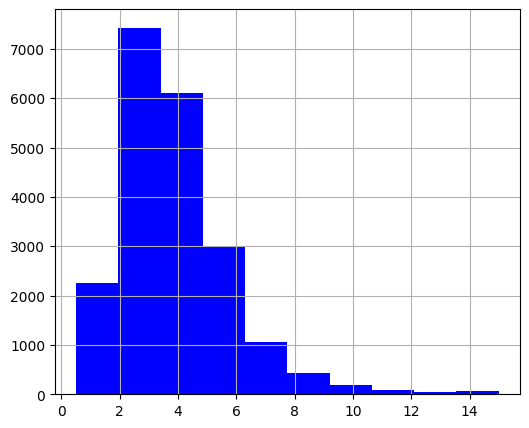

In [9]:
# Graficar el promedio de ingresos
plt.figure(figsize=(6,5))
plt.hist(hist_median_income, 10, density=False, facecolor='blue')
plt.grid(True)
plt.show()

#data['median_income'].hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

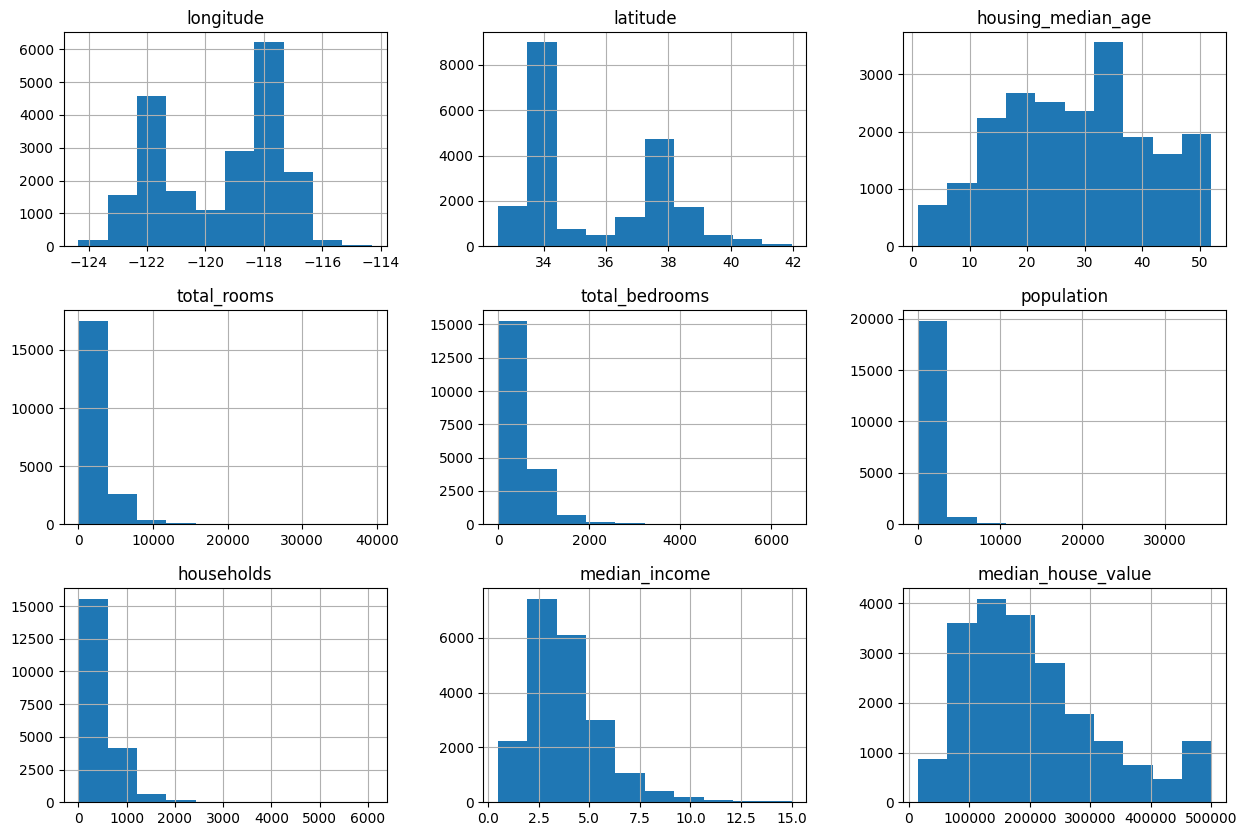

In [10]:
#Graficar todas las variables numericas 
data.hist(figsize=(15,10))

#### Mapa de California

<img src="figuras/CaliforniaMapa.png" align="middle" style="width:550px;" />

### Mapa de California (Sin Folium)

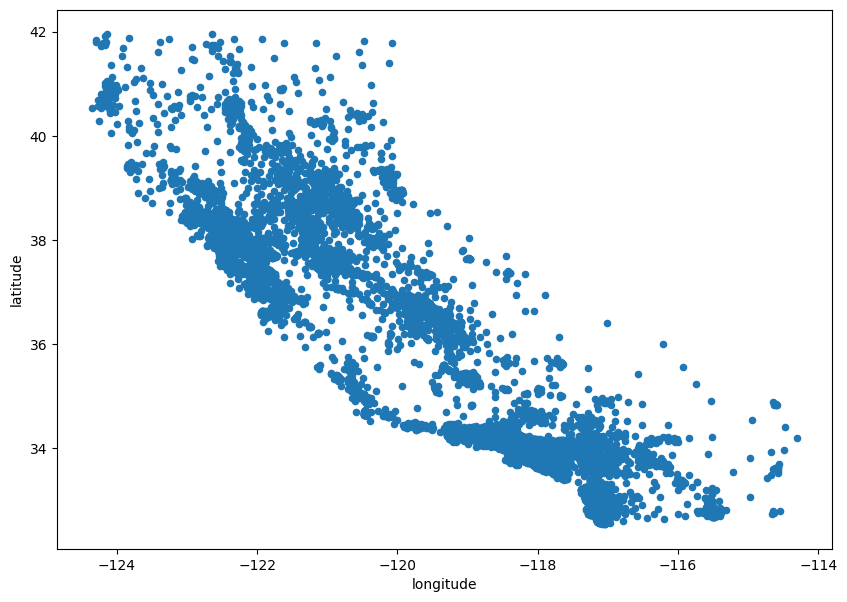

In [11]:
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
data.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7));

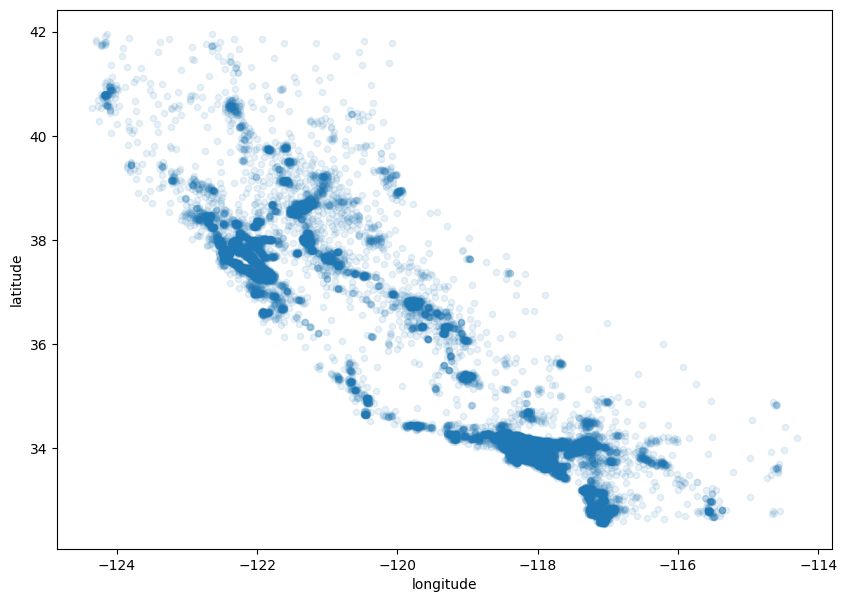

In [12]:
#Agregar alpha=0.1
data.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7),
                alpha=0.1);
#visualizar el traslape, la desidad de los distritos

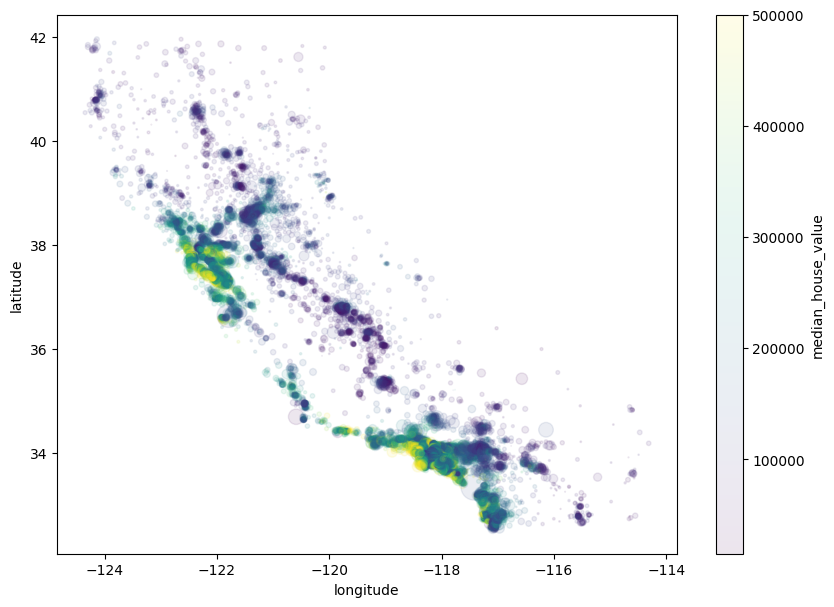

In [13]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
data.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.1, s=data.population / 100 ,
                c='median_house_value', colorbar=True);

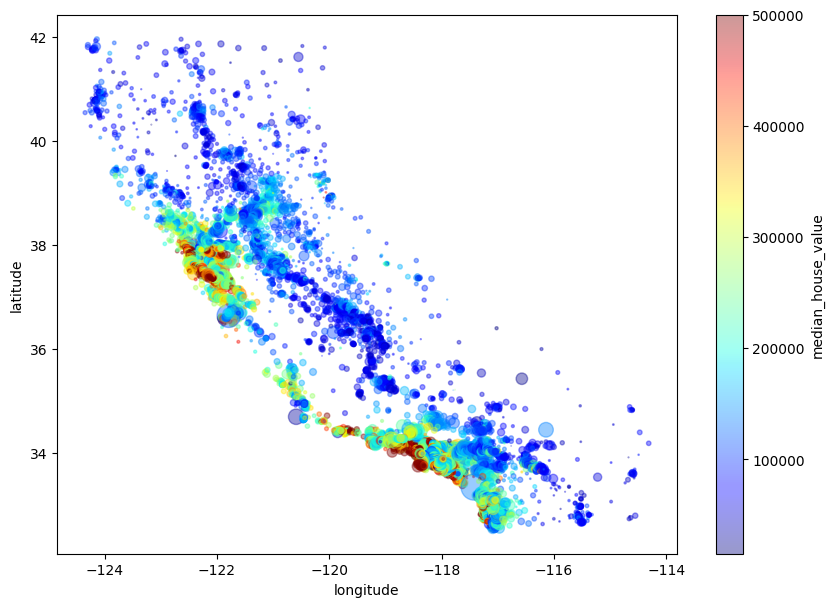

In [14]:
#pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
data.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.4,
                s=data.population / 100,
                c='median_house_value',
                cmap=plt.get_cmap('jet'),
                colorbar=True);

### Mapa de California (Con Folium)

In [66]:
#pip install folium
import folium
mapa = folium.Map(location=[37.50, -122.2], zoom_start=6)
mapa

In [19]:
#Hacer un arreglo llamado 'distritos_loc' que contenga solo la informacion de las coordenadas latitud y longitud
distritos=data[['latitude', 'longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [114]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap(distritos, radius=15, min_opacity=0.4).add_to(mapa)
mapa

### Correlación de variables

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

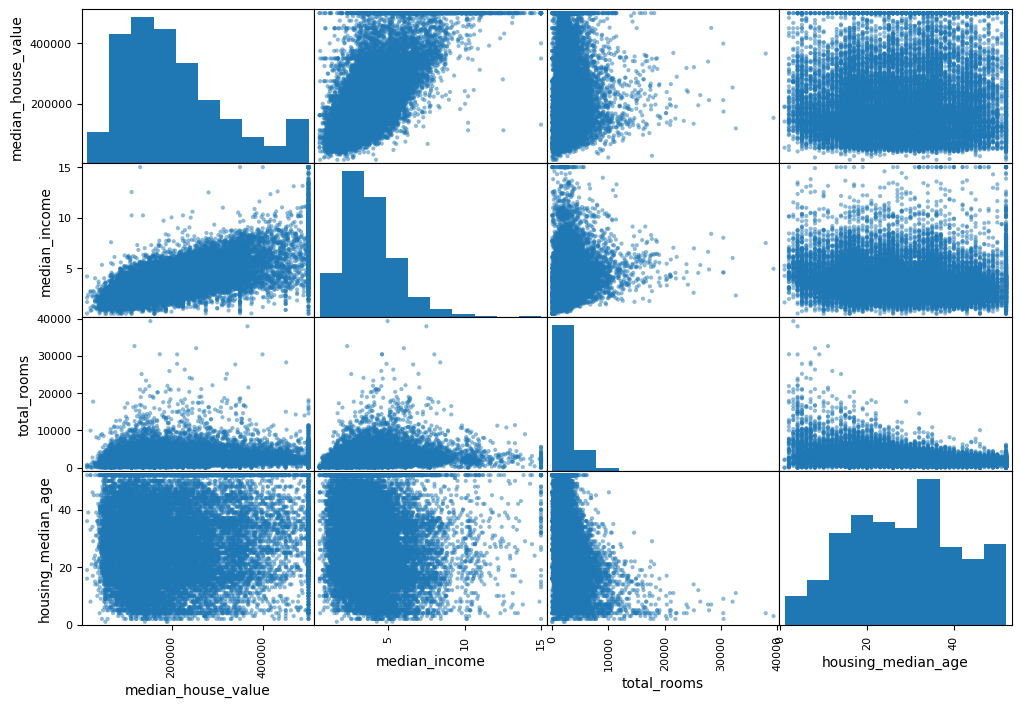

In [24]:
#Hacer diagramas de correlación
# Definir una lista llamada atributos  con las siguientes variables : 
# "median_house_value", "median_income", "total_rooms","housing_median_age"
from pandas.plotting import scatter_matrix

#lista
atributos=["median_house_value",
           "median_income",
           "total_rooms",
           "housing_median_age"]

scatter_matrix(data[atributos], figsize=(12,8))

In [32]:
# Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de
# la variables total_bedrooms con total_rooms
data['bed_rooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20630    -121.09     39.48                25.0       1665.0           374.0   
20631    -121.21     39.49                18.0        697.0           150.0   
20632    -121.22     39.43                17.0       2254.0           485.0   
20633    -121.32     39.43                18.0       1860.0           409.0   
20634    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20630       845.0       330.0         1.5603             78100.0   
20631       356.0       114.0         2.5568             77100.0   
20632      1007.0       433.0         1.7000             92300.0   
20633       741.0       349.0         1.8672             84700.0   
20634      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  bed_rooms_per_room  
0            NEAR BAY            0.146591  
1            NEAR BAY            0.155797  
2            NEAR BAY            0.129516  
3            NEAR BAY            0.184458  
4            NEAR BAY            0.172096  
...               ...                 ...  
20630          INLAND            0.224625  
20631          INLAND            0.215208  
20632          INLAND            0.215173  
20633          INLAND            0.219892  
20634          INLAND            0.221185  

[20635 rows x 11 columns]

In [33]:
data['population_per_households'] = data['population'] / data['households']
data['total_rooms_per_households']= data['total_rooms'] / data['households']
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20630    -121.09     39.48                25.0       1665.0           374.0   
20631    -121.21     39.49                18.0        697.0           150.0   
20632    -121.22     39.43                17.0       2254.0           485.0   
20633    -121.32     39.43                18.0       1860.0           409.0   
20634    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20630       845.0       330.0         1.5603             78100.0   
20631       356.0       114.0         2.5568             77100.0   
20632      1007.0       433.0         1.7000             92300.0   
20633       741.0       349.0         1.8672             84700.0   
20634      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  bed_rooms_per_room  population_per_households  \
0            NEAR BAY            0.146591                   2.555556   
1            NEAR BAY            0.155797                   2.109842   
2            NEAR BAY            0.129516                   2.802260   
3            NEAR BAY            0.184458                   2.547945   
4            NEAR BAY            0.172096                   2.181467   
...               ...                 ...                        ...   
20630          INLAND            0.224625                   2.560606   
20631          INLAND            0.215208                   3.122807   
20632          INLAND            0.215173                   2.325635   
20633          INLAND            0.219892                   2.123209   
20634          INLAND            0.221185                   2.616981   

       total_rooms_per_households  
0                        6.984127  
1                        6.238137  
2                        8.288136  
3                        5.817352  
4                        6.281853  
...                           ...  
20630                    5.045455  
20631                    6.114035  
20632                    5.205543  
20633                    5.329513  
20634                    5.254717  

[20635 rows x 13 columns]

In [35]:
atributos=["median_house_value",
           "median_income",
           "bed_rooms_per_room",
           "total_rooms",
           "housing_median_age",
          "population_per_households",
          "total_rooms_per_households"]

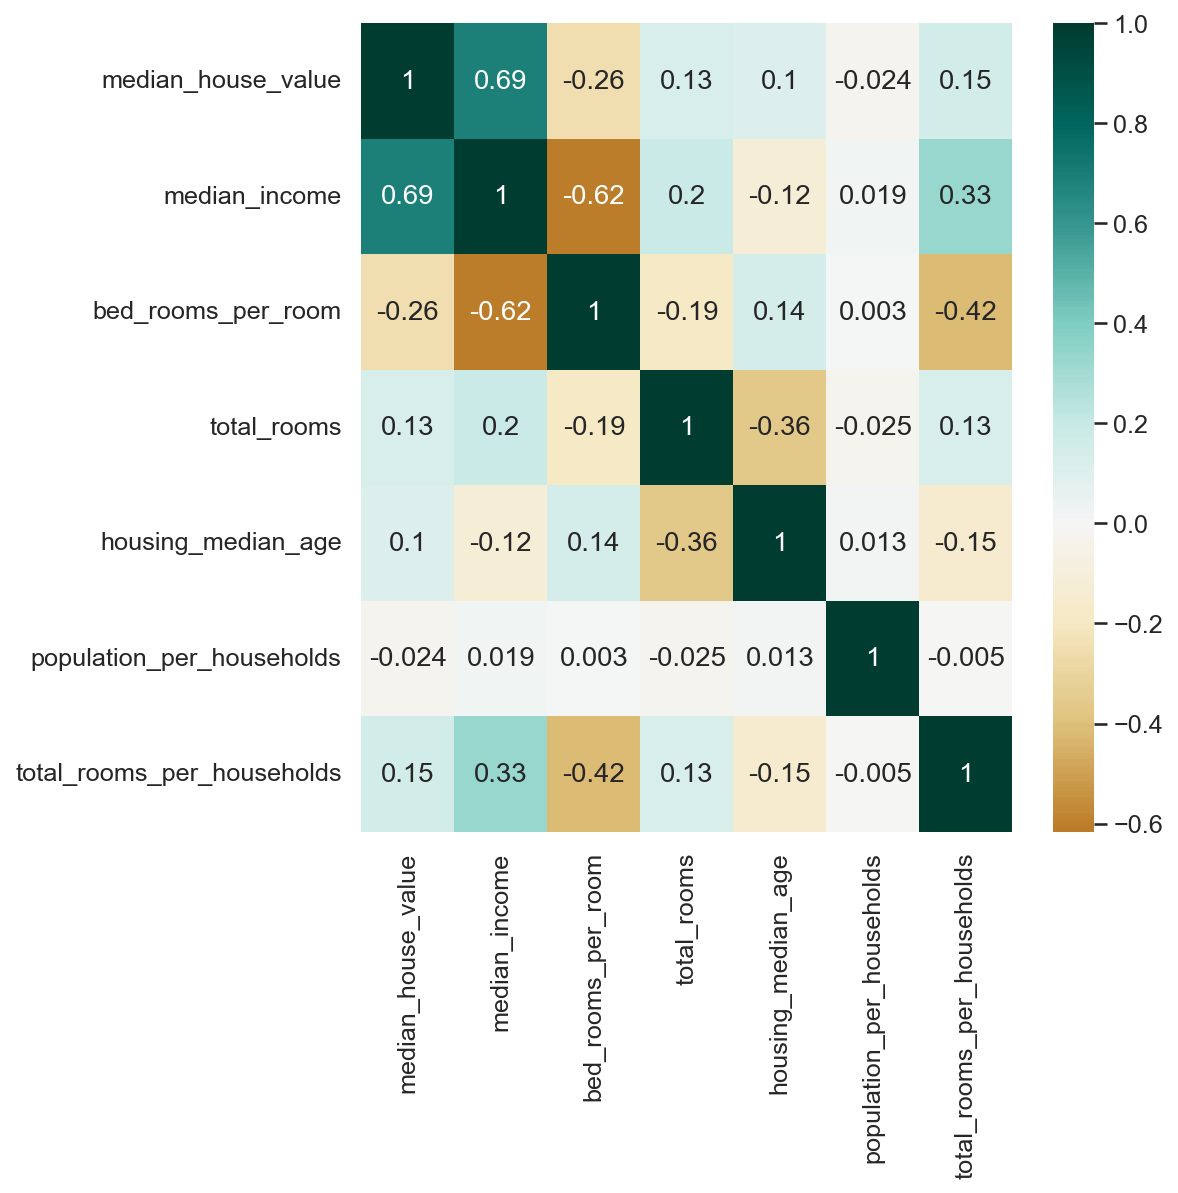

In [37]:
# Matriz correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sn

plt.figure(figsize=(7,7),  dpi = 150)
corrMatrix = data[atributos].corr().round(3)
sn.set( font_scale= 1.1 )
sn.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )
plt.xticks( rotation = 90 )
plt.show()

## 4. Prepare los datos y sus transformadores 

In [38]:
#Revisar si hay datos perdidos NaN
data.isnull().any().any()

True

In [39]:
#Número de filas
len(data)

20635

In [40]:
# eliminar datos  perdidos NaN
data = data.dropna()

In [41]:
len(data)

20428

**Tipos de variables**

<img src="figuras/categarical_variables.jpg" align="middle" style="width:550px;" />

In [42]:
# Revisar nuevamente la columna 'ocean_proximity'
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64

In [43]:
#pip install -U scikit-learn
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
nominal_codificador = OneHotEncoder(sparse_output=False)
nominal_codificador.fit_transform(data.ocean_proximity.to_frame())

#transformación de los datos a un vector

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [44]:
data['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20630      INLAND
20631      INLAND
20632      INLAND
20633      INLAND
20634      INLAND
Name: ocean_proximity, Length: 20428, dtype: object

In [45]:
## Ejemplo codificacion Ordinal
#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificadir.fit_transform(df[["ocean_proximity"]])
#O_codificadir.categories_


In [46]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20630    -121.09     39.48                25.0       1665.0           374.0   
20631    -121.21     39.49                18.0        697.0           150.0   
20632    -121.22     39.43                17.0       2254.0           485.0   
20633    -121.32     39.43                18.0       1860.0           409.0   
20634    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20630       845.0       330.0         1.5603             78100.0   
20631       356.0       114.0         2.5568             77100.0   
20632      1007.0       433.0         1.7000             92300.0   
20633       741.0       349.0         1.8672             84700.0   
20634      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  bed_rooms_per_room  population_per_households  \
0            NEAR BAY            0.146591                   2.555556   
1            NEAR BAY            0.155797                   2.109842   
2            NEAR BAY            0.129516                   2.802260   
3            NEAR BAY            0.184458                   2.547945   
4            NEAR BAY            0.172096                   2.181467   
...               ...                 ...                        ...   
20630          INLAND            0.224625                   2.560606   
20631          INLAND            0.215208                   3.122807   
20632          INLAND            0.215173                   2.325635   
20633          INLAND            0.219892                   2.123209   
20634          INLAND            0.221185                   2.616981   

       total_rooms_per_households  
0                        6.984127  
1                        6.238137  
2                        8.288136  
3                        5.817352  
4                        6.281853  
...                           ...  
20630                    5.045455  
20631                    6.114035  
20632                    5.205543  
20633                    5.329513  
20634                    5.254717  

[20428 rows x 13 columns]

###  ColumnTransformer  y pipeline

<img src="figuras/pipeline.jpg" align="middle" style="width:500px;" />

#### Pipeline

La función pipeline permite juntar varios trasformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo trasnformación1', trasnformación1), ('titulo trasnformación2', trasnformación2),...])**




In [47]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [48]:
# Crear la lista de variables numericas y categoricas
# Númericas: 'median_income', 'total_rooms','housing_median_age','bed_rooms_per_room'
# Categoricas: 'ocean_proximity'

lista_numerica=['median_income', 'total_rooms', 'housing_median_age','bed_rooms_per_room', 'population_per_households', 'total_rooms_per_households']
lista_categorica=['ocean_proximity']

#para agilizar

In [49]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.

transformer_num=Pipeline( [ ('scaler', StandardScaler() ) ] )
transformer_cat=Pipeline( [ ('onehot',  OneHotEncoder() ) ] )

#### ColumnTransformer


ColumnTransformer es una clase de scikit-learn que  permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo,  permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas numéricas, y una secuencia separada de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transformadores.

Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformación a aplicar y los índices de columna a los que aplicar. Por ejemplo: **(Nombre, objeto, columnas)**

In [50]:
# Definir los transformadores

transformer=ColumnTransformer([('num', transformer_num, lista_numerica),
                              ('cat', transformer_cat, lista_categorica) ] )

In [7]:
#Tener presente este orden numerico + categorico

### Preparando las muestras de entrenamiento y prueba

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">


División general de los datos
* **X**: Datos  sin la columna "median_house_value""
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [51]:
# Crear X (Quitar la columna o campo de "median_house_value")

X = data.drop("median_house_value", axis=1)
X.head(2)

#datos que no me interesan para la predicción

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income ocean_proximity  bed_rooms_per_room  \
0       322.0       126.0         8.3252        NEAR BAY            0.146591   
1      2401.0      1138.0         8.3014        NEAR BAY            0.155797   

   population_per_households  total_rooms_per_households  
0                   2.555556                    6.984127  
1                   2.109842                    6.238137

In [52]:
# Crear y (Valor de de la columna "median_house_value")

y = data['median_house_value']
y

#datos que interesan para la predicción

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20630     78100.0
20631     77100.0
20632     92300.0
20633     84700.0
20634     89400.0
Name: median_house_value, Length: 20428, dtype: float64

In [58]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.75) #se indica el porcentaje de entrenamiento
X.shape

#se obtienen 4 elementos: conjuto de X de entrenamiento, X de test, y de entrenamiento & y test

(20428, 12)

In [59]:
# Revise  el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15321, 12), (5107, 12), (15321,), (5107,))

## 5.  Seleccione algunos modelos y realice el entrenamiento (train).


In [60]:
# Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression() #guardar modelo en variable para posteriormente llamarlo

In [61]:
# Pipeline de la predicción completa.

modelo_linear=Pipeline([ ('transformer', transformer),
                       ('linear_regression',linear_regression)])

In [62]:
#Datos con los que se entrenará el modelo
modelo_linear.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [63]:
#Probamos en unas pocas instancias 
muestra = X_test.iloc[:4]
modelo_linear.predict(muestra)

array([ 46104.13028561, 186367.95051268, 210105.9338648 ,  92532.18190736])

In [64]:
#Comparamos con los valores reales
list(y_test.iloc[:4])

[162500.0, 262000.0, 161800.0, 81900.0]

#### Cross validation


from sklearn.model_selection import cross_val_score

La validación cruzada o  cross validation  (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados. 

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en la imagen (ejemplo con k=5) 

<img src="figuras/cross_validation.jpg" align="middle" style="width:550px;" />
   


In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#https://github.com/scikit-learn/scikit-learn/issues/2439

#### Evaluación Linear Regression

In [65]:
# Evaluadar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import cross_val_score

#función que compara los valores de predicción con los de test, se repite 5 veces, tomando diferentes muestras, se define una métrica --> el negativo
# del valor cuadrático
linear_scores=cross_val_score(modelo_linear, X, y, 
                             scoring='neg_mean_squared_error', 
                              cv=5)
linear_scores

#se obtienen valores negativos

array([-5.61197424e+09, -6.52648746e+09, -6.06942761e+09, -5.97164317e+09,
       -5.21258489e+09])

In [67]:
# Cambiamos el signo y sacamos la raiz
linear_scores = np.sqrt(-linear_scores) #Root Mean Square Error (RMSE)
linear_scores

array([74913.11128867, 80786.67870347, 77906.53123761, 77276.40757769,
       72198.23330578])

In [68]:
#Definimos una función que nos devuelva el score, mean y standard deviation
def display_scores(scores):
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())

In [69]:
display_scores(linear_scores)

Mean 76616.19242264367
Standard Deviation 2895.260341802205


### DecisionTree

In [70]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_regressor=DecisionTreeRegressor()


In [71]:
#2. Definir el Pipeline : Transformación  + modelo
model_tree_regressor=Pipeline([ ('transformer', transformer),
                       ('tree_regressor', tree_regressor)])


In [72]:
#3. Ajustar el modelo
model_tree_regressor.fit(X_train, y_train)

#entrenamiento

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_regressor', DecisionTreeRegressor())])

In [73]:
list(modelo_linear.predict(muestra))

[46104.130285613996, 186367.95051268497, 210105.9338648034, 92532.18190736341]

In [74]:
#prueba con una muestra
muestra = X_test.iloc[:4]
list(model_tree_regressor.predict(muestra))

[125000.0, 158700.0, 166700.0, 67200.0]

In [75]:
#mostrar los primeros datos para compararlos
list(y_test.iloc[:4])

[162500.0, 262000.0, 161800.0, 81900.0]

In [76]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
tree_regressor_scores=cross_val_score(model_tree_regressor, X, y, 
                             scoring='neg_mean_squared_error', 
                              cv=5)
tree_regressor_scores

array([-7.42313583e+09, -8.35361406e+09, -7.17008869e+09, -8.92061879e+09,
       -8.19299717e+09])

In [48]:

# 5. Realizar el cambio de signo y sacar la raiz


In [77]:

# 6. Mostrar el resultado usando la funcion display_scores
display_scores(  np.sqrt(-tree_regressor_scores)  )

Mean 89439.26192661376
Standard Deviation 3565.0149964764446


### RandomForest

In [78]:
#Aplicar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
#1. Nombrar una variable para nuestro modelo
forest_regressor = RandomForestRegressor()

In [80]:
#2. Definir el Pipeline : Transformación  + modelo
model_forest_regressor=Pipeline([ ('transformer', transformer),
                       ('forest_regressor',forest_regressor)])

In [81]:
#3. Ajustar el modelo
model_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor', RandomForestRegressor())])

In [84]:
#Comparación de los modelos con datos reales


In [82]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_regressor_scores=cross_val_score(model_forest_regressor, X, y, 
                             scoring='neg_mean_squared_error', 
                              cv=5)
forest_regressor_scores

array([-4.15955565e+09, -4.57613015e+09, -3.98840880e+09, -5.04745099e+09,
       -4.34131952e+09])

In [55]:
# 5. Realizar el cambio de signo y sacar la raiz


In [83]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores( np.sqrt(-forest_regressor_scores) )

Mean 66445.93458023426
Standard Deviation 2740.58381079976


#### Resumen

| Modelo o clasificador   |  Mean | Standard deviation  |
|---|---|---|
|  Linear Regression  |  76616.19  |   2895.26    |
|   DecisionTree |  89439.26  |    3565.014    |
|  Random Forest   |  66445.93 |    2740.58    |


In [101]:
# Datos de evalación
list_model=['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean=[76616.19, 89439.26, 66445.93]
list_sd=[2895.26, 3565.014, 2740.58]

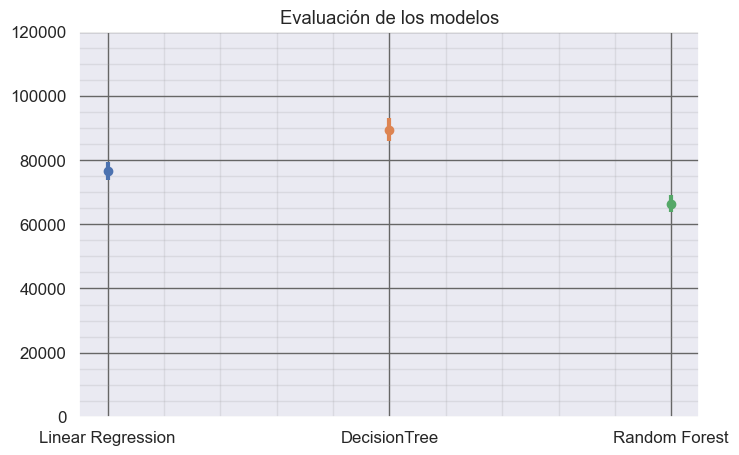

In [106]:
# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(8, 5))
for i, (model_mean, model_sd) in enumerate(zip(list_mean, list_sd)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(range(3), list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0,120000)
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.show()

## 6 .  Afina(fine tune) el modelo RandomForest


In [85]:
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV


In [86]:
#Definición de posibles parametros
n_estimators=[3, 30, 80, 100] #número de "árboles"
min_samples_split=[2,4,6,8]
max_depth=[2,4,6,8,10]

#cada modelo tiene sus propios parámetros, se modifican para ajustar el modelo

#definir diccionario
parametros = { 'forest_regressor__n_estimators':n_estimators,
            'forest_regressor__min_samples_split':min_samples_split,
            'forest_regressor__max_depth':max_depth}

parametros

{'forest_regressor__n_estimators': [3, 30, 80, 100],
 'forest_regressor__min_samples_split': [2, 4, 6, 8],
 'forest_regressor__max_depth': [2, 4, 6, 8, 10]}

In [87]:
#Definicion del grid de busqueda
grid = GridSearchCV(model_forest_regressor, 
                   param_grid=parametros,
                   scoring='neg_mean_squared_error',
                    #n_jobs=-1, para emplear todos los procesadores de la pc
                    cv=5,
                   verbose=2)

In [88]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 
grid.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=3; total time=   0.1s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=3; total time=   0.1s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=3; total time=   0.1s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=3; total time=   0.1s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=3; total time=   0.1s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=30; total time=   1.3s
[CV] END forest_regressor__max_depth=2, forest_regressor__min_samples_split=2, forest_regressor__n_estimators=30; total time=   1.4s
[CV] END for

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['median_income',
                                                                          'total_rooms',
                                                                          'housing_median_age',
                                                                          'bed_rooms_per_room',
                                                                          'population_per_households',
                                                                          'total_rooms_per_households']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('forest_regressor',
                                        RandomForestRegressor())]),
             param_grid={'forest_regressor__max_depth': [2, 4, 6, 8, 10],
                         'forest_regressor__min_samples_split': [2, 4, 6, 8],
                         'forest_regressor__n_estimators': [3, 30, 80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
# Mostrar la mejor combinación
grid.best_params_

#mejores valores para el modelo de random forest

{'forest_regressor__max_depth': 8,
 'forest_regressor__min_samples_split': 4,
 'forest_regressor__n_estimators': 80}

**Encontramos los nuevos valores de la media y desviación estándar**


In [90]:
#1 Ajustar el modelo con los nuevos parametros 
forest_regressor_tunned=RandomForestRegressor(max_depth=8,
                                              min_samples_split=4,
                                              n_estimators=80) 

In [91]:
#2. Definir el Pipeline : Transformación  + modelo
model_forest_tuned=Pipeline([ ('transformer', transformer),
         ('forest_regressor_tunned',forest_regressor_tunned)])

In [92]:
#3. Ajustar el modelo
model_forest_tuned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor_tunned',
                 RandomForestRegressor(max_depth=8, min_samples_split=4,
                                       n_estimators=80))])

In [96]:
#Comparación
print(list(model_forest_regressor.predict( muestra  )))
print(list(model_forest_tuned.predict( muestra  )))
print(list(y_test.iloc[:4]))

[109717.0, 228261.0, 165490.0, 93126.0]
[110481.24624586801, 183395.55309977988, 183765.77040971234, 82077.82761862279]
[162500.0, 262000.0, 161800.0, 81900.0]


In [94]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_tunned_scores=cross_val_score(model_forest_tuned, 
                                     X, y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=5)
forest_tunned_scores

array([-3.75061509e+09, -4.57813364e+09, -3.99288122e+09, -4.52221895e+09,
       -4.13212224e+09])

In [97]:
# 5. Realizar el cambio de signo y sacar la raiz


In [95]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores( np.sqrt(-forest_tunned_scores))

Mean 64724.49057841867
Standard Deviation 2436.0927437543537


#### Extra 1 : Random grid

In [98]:
#Definición de posibles parametros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2,3,4,5,6 ]
min_samples_leaf = [1, 2, 3,4,5,6 ]

params_grid = {'forest_reg__n_estimators': n_estimators,
               'forest_reg__max_features': max_features,
               'forest_reg__max_depth': max_depth,
               'forest_reg__min_samples_split': min_samples_split,
               'forest_reg__min_samples_leaf': min_samples_leaf
              }

print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [110]:
#Modulo RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest= RandomizedSearchCV(estimator = model_forest_regressor, 
                               param_distributions = params_grid, n_iter = 5, cv = 10,
                               random_state=42, n_jobs = -1,verbose=10)

In [109]:
# Ajuste del modelo usando aleatoriamente algunas iteraciones
gridRandom_forest.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10; 1/5] START forest_reg__max_depth=16, forest_reg__max_features=sqrt, forest_reg__min_samples_leaf=5, forest_reg__min_samples_split=4, forest_reg__n_estimators=70


ValueError: Invalid parameter 'forest_reg' for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
# Mejores parametros encontrados
gridRandom_forest.best_params_

#### Extra 2: Ranking de parámetros

In [111]:
#Puntaje de las variables
ranking= (grid.best_estimator_.named_steps["forest_reg"].feature_importances_).tolist()
ranking

KeyError: 'forest_reg'

In [ ]:
sum(ranking)

In [ ]:
numeric_list

In [ ]:
categorical_list_ocean_proximity = Nominal_codificador.categories_[0].tolist()
categorical_list_ocean_proximity 

In [ ]:
list_atributos=numeric_list+categorical_list_ocean_proximity
list_atributos

In [ ]:
[(ranking[i], list_atributos[i])  for i in range(len(ranking))]

### Análisis final 

In [112]:
# Datos de evaluación
lista_modelos=['LR', 'DT', 'RF', 'RF-tunned']
lista_mean=[76616.19, 89439.26, 66445.93, 64724.49]
lista_sd=[2895.26, 3565.014, 2740.58, 2436.09]

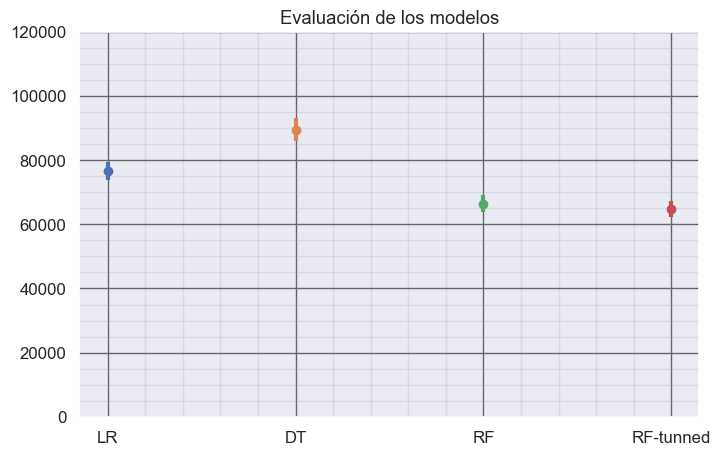

In [113]:
# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(8, 5))
for i, (model_mean, model_sd) in enumerate(zip(lista_mean, lista_sd)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(range(4), lista_modelos)
plt.title("Evaluación de los modelos")
plt.ylim(0,120000)
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.show()

#### → **Resultados y conclusiones** 

Se llevó a cabo un proceso similar al realizado en clases, pero esta vez añadiendo y considerando 2 nuevas variables en el análisis, habitantes por hogar y total de habitaciones por hogar.

Al comparar los modelos se obtuvo que el mejor para predecir los precios de las casas fue el de RandomForest ya que la media y la desviación estándar fueron menores en comparación a los modelos de Regresión Lineal y DecisionTree; posteriomente al afinar el modelo de RandomForest modificando sus parámetros se disminuyeron tanto la media como la desviación estándar, obteniendo así una mejor predicción. Esto se puede observar en la gráfica anterior.